<center>
    <div style="font-size: 48px;">ECS 117 HW 1</div>
    <div style="font-size: 20px;">Submitted By: Darren Lam</div>
</center>

# Introduction

The objective of this assignment is to examine the intricacies of search algorithms, particularly linear search and binary search, 
within the context of data science algorithms. The goal is to deepen understanding of algorithmic efficiency and its practical implications in problem-solving. By comparing linear and binary search algorithms, we can evaluate how their time and space complexities influence their performance on datasets of varying sizes and characteristics. Through this exploration, we gain valuable insights into choosing the right algorithm for different scenarios, enhancing our problem-solving skills and our ability to optimize computational processes.


In [51]:
import time
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Function Implementation

Here we implement a class called SearchAlgorithms that contains three static methods. The first method generates an array of random numbers from 0 to 10000 for a given input size. The second method defines an iterative linear search that returns the index of the target input if found and -1 otherwise. Finally, the last method defines an iterative binary search that also utilizes Python's inbuilt sorted function to sort the list before iterating through the list. In this case, the function finds the middle of the array and determines if it matches the target. If not, there are two cases: if the target is larger than the middle number, then the function looks at the right side of the array, if it is smaller, the function looks at the left side of the array. This is repeated until the target is found or the array is exhausted.

In [52]:
# 1. Function Implementation
class SearchAlgorithms:

    # Generate an array of random integers using the random package
    @staticmethod
    def generate_array(size):
        return [random.randint(0, 10000) for _ in range(size)]

    # Define a linear search 
    @staticmethod
    def linear_search(array, target):
        for index, value in enumerate(array):
            if value == target:
                return index
        return -1

    # Define a binary search 
    @staticmethod
    def binary_search(array, target):
        array = sorted(array)
        low, high = 0, len(array) - 1

        while low <= high:
            mid = (low + high) // 2

            if array[mid] == target:
                return mid
            elif array[mid] > target:
                high = mid - 1
            else:
                low = mid + 1
            return -1

# Simulation

In this section, we test the runtimes of a single instance of both searches on an array who's size is specified by the user. To accomplish this testing, we first define a function that returns the execution time of the specified search (linear or binary) for a given number of searches. This allows us to time execution time for both single instances and multiple instances. Then, we set a random seed for reproducibility and initialize an instance of the SearchAlgorithms class. We next prompt the user for the array size and generate the array for the given size. We then run and print the execution time for a single instance of both linear and binary search.

In this case, the user specified an array size of 1000. Our simulation indicated that linear search took almost a tenth of the time to execute compared to binary search. We will discuss this cause of this time discrepancy in the next section.

In [53]:
# 2. Simulation

# Create a function to measure execution time for either search
def execute_search_time(algos, search, array, num_searches):
    start_time = time.time()
    if search == 1:
        for _ in range(num_searches):
            target = random.choice(array)
            algos.linear_search(array, target)
    else:
        for _ in range(num_searches):
            target = random.choice(array)
            algos.binary_search(array, target)
    return time.time() - start_time

# Set seed for reproducibility
random.seed(123)

# Initialize instance of class
algos = SearchAlgorithms()

# Prompt user for size of array and generate array
size = int(input("size: "))
array = algos.generate_array(size)

# Time linear search
print("Linear search took:", execute_search_time(algos, 1, array, 1), "seconds")

# Time binary search
print("Binary search took:", execute_search_time(algos, 2, array, 1), "seconds")


size:  1000


Linear search took: 2.6702880859375e-05 seconds
Binary search took: 0.0001628398895263672 seconds


# Testing and Analysis

In this section, we test and plot the execution times for multiple instances of searching. In our case, we examine the execution times for a number of searches between 1 and 5001, incrementing by 50. This allows us to visualize the trend in search time for both types of search. To accomplish this, we create a list of the search repetitions and an array to contain execution times. Then we input the list of search repetitions in the the function we created and record the execution times in the array. Finally, we plot the execution times and examine the results.

### Time Complexity
In class, we have learned that these two search types have two differing time complexities to execute. Linear search, which iterates through the list sequentially has a time complexity of O(n). On the other hand, because of its array-halving nature, binary search has a time complexity of O(logn).
### Space Complexity
Both of these search algorithms have a space complexity of O(1) because they are in-place and only take up as much space as the array itself.
### Array Performance
On arrays of different sizes, both of these algorithms perform differently. At smaller array sizes, the difference is not as prominent, however, it increases the larger the array is. Because of the shorter time complexity of binary search, it far outclasses linear search at large array sizes. However, it is not always better to use a binary search.
### Sorted vs. Unsorted Arrays
In the previous section and in the graphs of this section, we observe that the binary search algorithm took much longer than the linear search algorithm. This is because we compared their runtimes on an initial array that was not sorted. The reason why it is not always better to use a binary search is because binary search requires the array to be sorted. It cannot be run on an unsorted array because it would interfere with the decision-making that the algorithm uses to determine where to search. On the other hand, linear search does not require the array to be sorted.
### Advantages and Disadvantages
Comparing both of these algorithms, there are certainly cases in which one is more beneficial to use over the other. For linear searching, it is often the better choice over binary search when the array is unsorted. This avoids wasting unnecessary time sorting the array. However, if the array is sorted or the array is very large, binary search is often the better choice because of its superior time complexity.

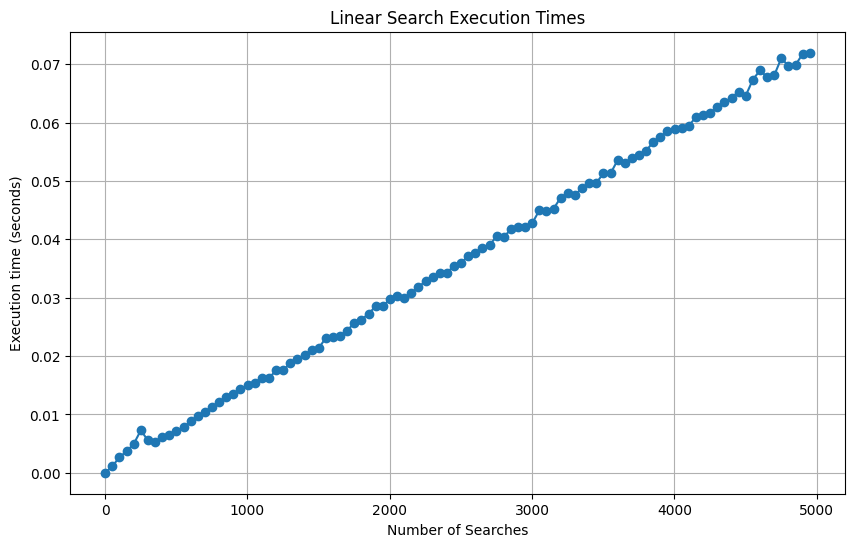

In [54]:
# 4. Testing and Analysis
# Choose number of searches
num_searches = range(1, 5001, 50)
execution_times1 = []
execution_times2 = []

# Linear Search Analysis
# Measure extraction time for each search size
for searches in num_searches:
    execution_time = execute_search_time(algos, 1, array, searches)
    execution_times1.append(execution_time)

# Plot execution times
plt.figure(figsize=(10, 6))
plt.plot(num_searches, execution_times1, marker='o')
plt.xlabel('Number of Searches')
plt.ylabel('Execution time (seconds)')
plt.title('Linear Search Execution Times')
plt.grid(True)
plt.show()

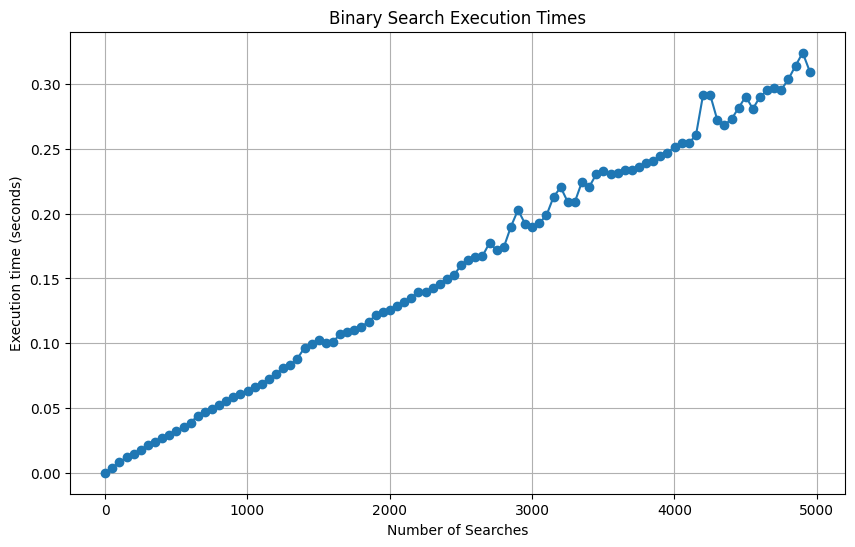

In [55]:
# Binary Search Analysis
# Measure extraction time for each search size
for searches in num_searches:
    execution_time = execute_search_time(algos, 2, array, searches)
    execution_times2.append(execution_time)

# Plot execution times
plt.figure(figsize=(10, 6))
plt.plot(num_searches, execution_times2, marker='o')
plt.xlabel('Number of Searches')
plt.ylabel('Execution time (seconds)')
plt.title('Binary Search Execution Times')
plt.grid(True)
plt.show()

# Conclusion

This assignment provided valuable insights into the efficiency and application of linear and binary search algorithms. By analyzing their time and space complexities, as well as their performance on different types and sizes of datasets, we were able to understand the importance of selecting the right algorithm for specific scenarios. While linear search is straightforward and versatile, binary search demonstrates superior efficiency for large, sorted datasets, especially in cases of repeated searches. This comparison highlights the trade-offs between simplicity and performance, which is a critical consideration in data science and real-world problem-solving. Overall, this exploration has enhanced our ability to evaluate algorithmic approaches, laying a strong foundation for optimizing computational tasks in future applications.